# CS5228 Assignment 1 - EDA, Data Preparation & K-Means

Hello everyone, this assignment notebook covers EDA, Data Preparation & K-Means. There are some code-completion tasks and question-answering tasks in this answer sheet. For code completion tasks, please write down your answer (i.e., your lines of code) between sentences that "Your code starts here" and "Your code ends here". The space between these two lines does not reflect the required or expected lines of code. For answers in plain text, you can refer to [this Markdown guide](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd) to customize the layout (although it shouldn't be needed).

When you work on this notebook, you can insert additional code cells (e.g., for testing) or markdown cells (e.g., to keep track of your thoughts). However, before the submission, please remove all those additional cells again. Thanks!

**Important:**
* Rename and save this Jupyter notebook as **cs5228_a1_YourName_YourNUSNETID.ipynb** (e.g., **cs5228_a1_BobSmith_e12345678.ipynb**) before submission!
* Rename and save the script file *cs5228_a1_script.py* as **cs5228_a1_YourName_YourNUSNETID.py** (e.g., **cs5228_a1_BobSmith_e12345678.py**) before submission!
* Submission deadline is **Thursday, Sep 14, 11.59 pm**. Late submissions will be penalized by 10% for each additional day. Failure to appropriately rename both files will yield a penalty of 1 Point. There is no need to use your full name if it's rather long; it's just  important to easily identify you in Canvas etc.

Please also add your NUSNET and student id in the code cell below. This is just to make any identification of your notebook doubly sure.

In [54]:
student_id = 'A0268269L'
nusnet_id = 'E1101568'

Here is an overview over the tasks to be solved and the points associated with each task. The notebook can appear very long and verbose, but note that a lot of parts provide additional explanations, documentation, or some discussion. The code and markdown cells you are supposed to complete are well, but you can use the overview below to double-check that you covered everything.

* **1 Exploratory Data Analysis (EDA) & Data Preparation (30 Points)**
    * 1.1 Removing "Dirty" Records (6 Points)
    * 1.2 Handling Missing (NaN) Values (6 Points)
    * 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)
        * 1.3 a) Appropriate Steps (4 Points)
        * 1.3 b) Additional Considerations (2 Points)
    * 1.4 Handling Categorical Attributes (4 Points)
    * 1.5 Basic Facts about Dataset (8 Points)
* **2 K-Means (20 Points)**
    * 2.1 Performing K-Means "By Hand" (4 Points)
        * 2.1 a) Find Clusters for K=3 (2 Points)
        * 2.1 b) Evaluate the Result (2 Points)
    * 2.2 Initializing Centroids (10 Points)
        * 2.2 a) Implement Initialization of Centroids (6 Points)
        * 2.2 b) Interpreting MaxDist Initialization (2 Points)
        * 2.2 c) Interpreting KMeans++ Initialization (2 Points)
    * 2.3 Questions about K-Means (6 Points)
        * 2.3 a) Empty Cluster (3 Points)
        * 2.3 b) Outlier Detection (3 Points)

## Setting up the Notebook

### Enable Auto-Reload

This ensures that any saved changes to your `.py` file gets automatically reloaded.

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Enable "Inline Plotting"

In [56]:
%matplotlib inline

### Importing Required Packages

In [57]:
import numpy as np
import pandas as pd

from src.utils import *

**Important:** This notebook also requires you to complete in a separate `.py` script file. This keeps this notebook cleaner and simplifies testing your implementations for us. As you need to rename the file `cs5228_a1.py`, you also need to edit the import statement below accordingly.

In [58]:
from cs5228_a1_HoGuanMengBenjamin_E1101568 import *

---

## 1. Exploratory Data Analysis (EDA) & Data Preparation

### 1.1 Removing "Dirty" Records (6 Points)

Assume that you have been tasked to build a regression model to predict the **resale prices of used cars** in Singapore. To this end, you get a dataset containing information about 15,000 past resale transactions, including the following information about the attributes:

* **listing_id**: Unique ID of the listing; an integer number uniquely assigned to each listing. If this code starts with the letter 'C', it indicates a cancellation of the listing and is this an invalid listing.
* **url**: URL of the website where the listing is posted as string value
* **make**: The make/brand of the car as a string value of a valid car make (e.g., "bmw", "honda", "mazda", "toyota", "mercedes-benz").
* **model**: The model of the car as a string value of a valid car model (e.g., "e250", "outlander", "v60", "x1", "qashqai").
* **manufactured**: The year the car has been manufactured as an integer value.
* **type_of_vehicle**: The type of the car as a string value of a valid vehicle type (e.g., "luxury sedan", "mid-sized sedan", "suv", "hatchback").
* **power**: The power of the engine as an integer value in kW (kilowatt)
* **engine_cap**: Size/capacity of the engine as integer value in cc (cubic centimeter)
* **curb_weight**: the weight of the vehicle including a full tank of fuel and all standard equipment in kg (kilogram)
* **no_of_owners**: Number of previous owners as integer value >= 1 (used cars only).
* **mileage**: Mileage of car as integer value in km (kilometer)
* **price**: Resale price of the car in Singapore dollars.

Let's have a first look at the data:

In [85]:
df_cars_dirty = pd.read_csv('data/a1-used-cars-resale-dirty.csv')

df_cars_dirty.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,983884,https://www.sgcarmart.com/listing/983884,nissan,qashqai,2015,suv,85,1197,1285,2,80000,52800
1,1026259,https://www.sgcarmart.com/listing/1026259,volkswagen,golf,2010,sports car,188,1984,1466,6,149000,105800
2,1002033,https://www.sgcarmart.com/listing/1002033,suzuki,vitara,2016,suv,88,1586,1160,1,84000,55800
3,1030109,https://www.sgcarmart.com/listing/1030109,kia,picanto,2007,hatchback,47,1086,852,2,105000,8888
4,1013252,https://www.sgcarmart.com/listing/1013252,porsche,cayenne,2014,suv,193,2967,2185,3,108650,162800


If you check the dataset against its description as given above -- with the help of `pandas` or by simply inspecting the raw data file -- you will notice that many records are "dirty", meaning they are not in the expected format. Dirty records can negatively affect any subsequent analysis it needs.

**Perform EDA on the Used Cars Resale Price dataset and perform appropriate preprocessing steps to clean the data!**
The preprocessing step for cleaning the data step may include
* the *removal* of "dirty records" or
* the *modification* of "dirty records" records

**Task 1: Identify at least 3 issues** with the dataset that would negatively affect any subsequent analysis, and clean the data accordingly.

**Important:**

* Recall from the lecture that data cleaning often involves making certain decisions. As such, you might come up with different steps than other students. This is OK as long as you can reasonably justify your steps.
* The goal is to preserve as much of the records as possible! So only remove records as part of your data cleaning if it's really necessary (this includes that you should not remove any attributes!). There might be different valid cases, so don't forget to briefly justify your decision.
* For this task, we are **not** trying to identify "noise" (e.g., outliers in the form of suspicious values) or `NaN` values; this will be covered later. Here, we look for records with values not eligible to be used for an analysis because they do not adhere to the data description.

Please provide your answer below. It should list the different issues you have identified and briefly discuss which data cleaning steps you can and/or need to perform to address those issues.

**Your answer:**

### Issues with dataset
#### 1. Duplicated Data Points (Done)
By using `df_cars_dirty["listing_id"].unique()`, we can see that there are only **14,321 unique listing ids**, which means that **there are duplicated listings in the dataset**.

#### 2. Dirty Data in Manufacturing Year
When checking the output of `df_cars_dirty["manufactured"].unique()` we can identify entries where the year is not valid, like 2119, 2114, etc. On one hand, we may assume that the errors can be corrected by replacing the second digit '1' to '0', for example, 2119 - 2019, which is logical since all the occurrence of dirty data have this same discrepancy. However, since the same vehicle make and model can have different manufacturing years, we cannot verify if the corrected data is factually true. In this case, we choose to remove such data from the dataset to avoid ambiguity.

#### 3. Same Vehicle Make Appears In Two Different Forms
There are 3 entries in the dataset where the **_vehicle make is specified as "mercedes"_**, while the **_model is specified as "benz"_**. We shall not remove these data points because of this discrepancy. Instead, we can **_correct the mistakes in the column values_**. First, the **_"make" will be corrected to "mercedes-benz"_**. Next, to find out the "model" of these 3 cars, we **_compare the other specs, such as manufactured date, type of vehicle, power, engine capacity and curb weight with data from the other "mercedes-benz" data points._** Together with a **_simple google search_** on the specs of these 3 unknown vehicles, we can identify the **_missing "model" labels to be "a200" and "a180"._**

#### 4. Dirty "curb_weight" Data
There are two issues with "curb_weight" data.
a) The "curb_weight" column contains 280 "XXXXX" values. We can find the correct curb weight value for the particular model by matching the other vehicle specifications with other listings. However, even after matching, there exists some vehicle models that have multiple valid curb weights. For example, toyota qashqai has curb weight variants of 1285 and 1325. For these cases, we will ignore the "XXXXX" values and remove them after. This amounts to 106 entries. We have managed to retain more than half the dirty data.

b) The "curb_weight" column is in string format. As this data can be considered ratio data, we will convert all the "curb_weight" values into integer form.


**Task 2: Complete the method `clean` in the `.py` file to actually implement your steps for handling "dirty" records!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [86]:
df_cars_cleaned = clean(df_cars_dirty)

print('After preprocessing, there are now {} records.'.format(df_cars_cleaned.shape[0]))

/Users/benho/Documents/mcomp/cs5228/cs5228_assignments/assignment1/cs5228_a1_HoGuanMengBenjamin_E1101568.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # assert len(df_cars_cleaned) == 14321, "expected 14,321 entries after removing dirty manufacturing years"
/Users/benho/Documents/mcomp/cs5228/cs5228_assignments/assignment1/cs5228_a1_HoGuanMengBenjamin_E1101568.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


After preprocessing, there are now 13951 records.


### 1.2 Handling Missing (NaN) Values (6 Points)

Many traditional data mining algorithms do not like missing (NaN) values and will throw an error if missing values are present. We therefore have to address missing values and get rid of them. On the other hand, we want to preserve as much of our dataset as possible, so we need to be smart about that. In this subtask, you are provided with a version of our used cars resale dataset that contains missing values but is otherwise clean -- so it is all about the `NaN` values here.

Let's load the dataset and have a quick look -- the attributes are the same as before:

In [10]:
df_cars_nan = pd.read_csv('data/a1-used-cars-resale-nan.csv')

df_cars_nan.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1023911,https://www.sgcarmart.com/listing/1023911,toyota,corolla,2009,mid-sized sedan,81,1496,1130.0,3,127450.0,20800.0
1,1022346,https://www.sgcarmart.com/listing/1022346,toyota,estima,2007,mpv,125,2362,1710.0,4,103000.0,52500.0
2,1017880,https://www.sgcarmart.com/listing/1017880,citroen,c3,2018,suv,81,1199,1203.0,1,35000.0,68000.0
3,1022468,https://www.sgcarmart.com/listing/1022468,renault,grand,2015,mpv,81,1461,1539.0,1,80848.0,52800.0
4,1026440,https://www.sgcarmart.com/listing/1026440,mercedes-benz,e200,2009,luxury sedan,135,1796,1615.0,2,116199.0,73800.0


Since your decision for handling `NaN` values might depend in the data mining task, assume in the following that you want to use this dataset to **create a regression model to predict the resale price** from the attributes of a transaction. Of course, there will be no need to actually create such a model here.

**Task 1: Identify all `NaN` values in the dataset and handle them appropriately!** After this preprocessing, the resulting dataset should no longer contain any `NaN` values. Please provide your answer in the markdown cell below list all issues concerning `NaN` values and how you would handle them with a brief justification for your approach. Additional (simplifying) guidelines:

* The goal is to preserve as many records in the dataset as possible.
* You do not need to consider external knowledge (i.e., information coming from outside this dataset)
* Ignore more sophisticated solutions such as [`sklearn.impute.KNNImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html). These can be very useful in practice (and maybe for your project), but their application requires certain assumptions to hold for good results. This is beyond the scope of this assignment.

**Your Answer:**

* There are 1503 NaN values in the "url" column, 987 NaN values in the "make" column, 741 NaN values in the "mileage" column and 445 NaN values in the "price" column.
* For the "url", the NaN values will be replaced by creating a url using the format "https://www.sgcarmart.com/listing/{listing_id}" since all listing urls follow the same format of "https://www.sgcarmart.com/listing/" + "listing_id".
* For the "make" data, the NaN values will be replaced by matching the model of the car to other listings to find the correct make.
* We theorize that mileage of a car depends on the number of previous owners, which relates to how much the car has likely been in use. By plotting a histogram of mileage data grouped by the number of previous owners, we observe that "mileage" data is generally slightly positively skewed and it is observable that the mileage increases with number of owners. To account for this distrubution, we replace missing mileage data with the median mileage for each group of number of previous owners.
* We theorize that price of a car depends on the type of vehicle it is and the number of previous owners of the car. Same as before, we use the median of price for each type of vehicle for each number of previous owners.

**Task 2: Complete the method `handle_nan` in the `.py` file to actually implement your steps for handling `NaN` values!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

In [11]:
df_cars_no_nan = handle_nan(df_cars_nan)

print('After handling missing values, there are now {} records.'.format(df_cars_no_nan.shape[0]))
print('Number of records with an NaN for any attribute: {}'.format((df_cars_no_nan.isna().sum(axis=1) > 0).sum()))

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
15,1031000,https://www.sgcarmart.com/listing/1031000,mazda,2,2018,luxury sedan,121,1998,1515.0,1,NaN,93888.0
27,1023134,https://www.sgcarmart.com/listing/1023134,honda,civic,2018,mid-sized sedan,127,1498,1324.0,1,NaN,98800.0
41,1011265,https://www.sgcarmart.com/listing/1011265,hyundai,elantra,2018,mid-sized sedan,93,1591,1345.0,1,NaN,64800.0
63,1012795,https://www.sgcarmart.com/listing/1012795,kia,cerato,2017,mid-sized sedan,95,1591,1295.0,1,NaN,67800.0
67,1030925,https://www.sgcarmart.com/listing/1030925,hyundai,avante,2009,mid-sized sedan,89,1591,1264.0,3,NaN,20998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14931,1028884,https://www.sgcarmart.com/listing/1028884,kia,cerato,2009,mid-sized sedan,92,1591,1251.0,2,NaN,22800.0
14949,1022813,https://www.sgcarmart.com/listing/1022813,hyundai,avante,2009,mid-sized sedan,89,1591,1264.0,3,NaN,14800.0
14953,1006457,https://www.sgcarmart.com/listing/1006457,toyota,corolla,2008,mid-sized sedan,80,1598,1195.0,2,NaN,43800.0
14957,1029934,https://www.sgcarmart.com/listing/1029934,opel,astra,2017,stationwagon,110,1399,1275.0,1,NaN,59888.0


,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
15,1031000,https://www.sgcarmart.com/listing/1031000,mazda,2,2018,luxury sedan,121,1998,1515.0,1,45000.0,93888.0
27,1023134,https://www.sgcarmart.com/listing/1023134,honda,civic,2018,mid-sized sedan,127,1498,1324.0,1,45000.0,98800.0
41,1011265,https://www.sgcarmart.com/listing/1011265,hyundai,elantra,2018,mid-sized sedan,93,1591,1345.0,1,45000.0,64800.0
63,1012795,https://www.sgcarmart.com/listing/1012795,kia,cerato,2017,mid-sized sedan,95,1591,1295.0,1,45000.0,67800.0
67,1030925,https://www.sgcarmart.com/listing/1030925,hyundai,avante,2009,mid-sized sedan,89,1591,1264.0,3,110000.0,20998.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14931,1028884,https://www.sgcarmart.com/listing/1028884,kia,cerato,2009,mid-sized sedan,92,1591,1251.0,2,79000.0,22800.0
14949,1022813,https://www.sgcarmart.com/listing/1022813,hyundai,avante,2009,mid-sized sedan,89,1591,1264.0,3,110000.0,14800.0
14953,1006457,https://www.sgcarmart.com/listing/1006457,toyota,corolla,2008,mid-sized sedan,80,1598,1195.0,2,79000.0,43800.0
14957,1029934,https://www.sgcarmart.com/listing/1029934,opel,astra,2017,stationwagon,110,1399,1275.0,1,45000.0,59888.0


,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
12,1028597,https://www.sgcarmart.com/listing/1028597,volvo,xc60,2018,suv,235,1969,1919.0,2,20000.0,NaN
72,1007494,https://www.sgcarmart.com/listing/1007494,mitsubishi,evolution,2008,sports car,206,1998,1540.0,3,140000.0,NaN
114,1027911,https://www.sgcarmart.com/listing/1027911,peugeot,5008,2020,suv,96,1199,1430.0,1,6000.0,NaN
134,1016145,https://www.sgcarmart.com/listing/1016145,mercedes-benz,cla200,2013,luxury sedan,115,1595,1430.0,1,80000.0,NaN
171,1026899,https://www.sgcarmart.com/listing/1026899,mercedes-benz,a200,2018,hatchback,120,1332,1375.0,1,39000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14742,990759,https://www.sgcarmart.com/listing/990759,bmw,x2,2019,suv,141,1998,1460.0,2,3600.0,NaN
14812,1011098,https://www.sgcarmart.com/listing/1011098,kia,carens,2009,mpv,108,1998,1597.0,5,165000.0,NaN
14836,1029046,https://www.sgcarmart.com/listing/1029046,mazda,3,2019,mid-sized sedan,88,1496,1385.0,1,8200.0,NaN
14929,1026494,https://www.sgcarmart.com/listing/1026494,mercedes-benz,gla180,2018,suv,90,1595,1435.0,1,21170.0,NaN


,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
12,1028597,https://www.sgcarmart.com/listing/1028597,volvo,xc60,2018,suv,235,1969,1919.0,2,20000.0,84800.0
72,1007494,https://www.sgcarmart.com/listing/1007494,mitsubishi,evolution,2008,sports car,206,1998,1540.0,3,140000.0,119800.0
114,1027911,https://www.sgcarmart.com/listing/1027911,peugeot,5008,2020,suv,96,1199,1430.0,1,6000.0,94800.0
134,1016145,https://www.sgcarmart.com/listing/1016145,mercedes-benz,cla200,2013,luxury sedan,115,1595,1430.0,1,80000.0,124888.0
171,1026899,https://www.sgcarmart.com/listing/1026899,mercedes-benz,a200,2018,hatchback,120,1332,1375.0,1,39000.0,71800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14742,990759,https://www.sgcarmart.com/listing/990759,bmw,x2,2019,suv,141,1998,1460.0,2,3600.0,84800.0
14812,1011098,https://www.sgcarmart.com/listing/1011098,kia,carens,2009,mpv,108,1998,1597.0,5,165000.0,25900.0
14836,1029046,https://www.sgcarmart.com/listing/1029046,mazda,3,2019,mid-sized sedan,88,1496,1385.0,1,8200.0,62594.0
14929,1026494,https://www.sgcarmart.com/listing/1026494,mercedes-benz,gla180,2018,suv,90,1595,1435.0,1,21170.0,94800.0


After handling missing values, there are now 15000 records.
Number of records with an NaN for any attribute: 0


### 1.3 Other Appropriate Data Cleaning / Preprocessing Steps (6 Points)

Identifying "dirty" records and missing data are two very fundamental and generally rather systematic steps as part of data cleaning / data preprocessing. However, as we saw in the lecture using some examples, there are many other issues with the dataset that can be considered noise and thus potentially negatively affecting any data analysis. So the more noise we can remove, the more likely we can expect meaning analysis results.

For this subtask, we use a version of our Used Cars Resale dataset **with no "dirty" records or missing data**! Note that this dataset has a few more attributes: `eco_category`, `transmission`, and `reg_date` (registration date). Let's have a look:

In [7]:
df_cars_others = pd.read_csv('data/a1-used-cars-resale-other.csv')

df_cars_others.head()

,listing_id,url,make,model,manufactured,reg_date,type_of_vehicle,eco_category,transmission,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1004862,https://www.sgcarmart.com/listing/1004862,Lamborghini,gallardo,2011,06-jan-2012,sports car,uncategorized,auto,412,5204,1500,5,49000,362800
1,1004953,https://www.sgcarmart.com/listing/1004953,Mitsubishi,attrage,2016,31-jul-2017,mid-sized_sedan,uncategorized,auto,57,1193,940,2,90000,43800
2,1031276,https://www.sgcarmart.com/listing/1031276,toyota,vios,2018,21-nov-2018,mid-sized sedan,uncategorized,auto,79,1496,1085,1,20270,56666
3,1024287,https://www.sgcarmart.com/listing/1024287,volkswagen,golf,2016,18-nov-2016,hatchback,uncategorized,auto,81,1197,1229,1,60000,54200
4,1023453,https://www.sgcarmart.com/listing/1023453,bmw,216d,2016,24-nov-2016,mpv,uncategorized,auto,85,1496,1480,2,80000,103000


#### 1.3 a) Appropriate Steps (4 Points)

**List at least 4 data cleaning / data preprocessing steps you deem appropriate to apply to the dataset above!** Please provide your answer in the markdown cell below list all steps together with a justification for your decision. Additional (simplifying) guidelines:

* You should still assume that we want to use this dataset to create a model for predicting the resale price of a flat based on its attributes. The choice of data mining task is very likely to affect your decision for what cleaning / preprocessing steps to apply.
* There is no need to consider external knowledge. For example, you do not have to check if a value for `model` is indeed an existing car model.
* Please do not address the concept of attribute encoding -- that is, the encoding of categorical attributes as numerical attributes -- in this subtask. This comes later.
* There is no need for you to implement any processing steps! Most important are your justifications for your decisions.

**Your Answer:**

1. The `eco_category` column only has one unique value throughout all the rows in the dataset, which is `'uncategorized'`. Since there is only one class in this feature, we are not able to make an analysis using `eco_category` as a feature that will determine the price of the car since all cars in the dataset, regardless of price will have the same `eco_category`. We will remove this column from the dataset.
2. We now have two time-related columns - `manufactured` and `reg_date`. The `manufactured` data tells us how long since the car was produced, which gives an indication of its intrinsic value. However, `reg_date` indicates the time that it was purchased by the first owner. This is turn, tells us how long the car has actually been in use for. We can hypothesise that the difference between the `reg_date` and `manufactured` date reflects how 'new' the car is in terms of its first use, and hence may affect its current price. Using an example of two cars with similar specifications and popularity, a car manufactured earlier may be registered later than a car that was manufactured later but registered earlier. Therefore, the former is likely to be used less and may be in better condition, thus commanding a higher price. To generate the new feature, we convert the `reg_date`, which is a string object, to retain only it's year value in `YYYY` format and convert it to an integer value. Then, we take the difference between the year and `manufactured` to get a new feature `manufactured_to_reg`.
3. There are a total of 526 unique car models in the dataset, of which the maximum count for occurrence of a unique class is for the amg model at 537, which accounts for only about 3% of the dataset. Additionally, there are 112 car models that only appear once in the dataset. To reduce the dimensionality of the dataset and make any resulting prediction model more generalizable, we can choose to remove the `model` column and only analyse ther cars based on their `make`. 
4. There are several instances of data that are factually incorrect. For example, checking the unique values of the `manufactured` date, we can identify several invalid entries, such as "2111", "2115", etc. We can give benefit of doubt and assume these are spelling errors and try to correct these data points. For example,  an entry of  '2111' could mean '2011'. We can try to use the information from the other columns, such as `make` and `model` for these invalid manufacturing years to try and deduce the correct manufacturing year. For those where similar data is not available, then we will omit the data.
5. In the `type_of_vehicle` column, there are duplicated categories for mid-sized sedan (`mid-sized_sedan` and `mid-sized sedan`), sports car (`sports car` and `sports_car`) and luxury sedan (`luxury_sedan` and `luxury sedan`). To eliminate the duplicated categories, we will standardise all words to be separated by an underscore ("_") and replace dashes ("-") with an underscore also.
6. In the vehicle `make` column, there is also the presence of same makes spelt differently. For example, we can find `'mercedes-benz'` and `'Mercedes'` entries and `'ssangyong'` and `'Ssangyong'` entries. Additionally, we also have the issue of using upper and lower casing causing extra unique values to appear. For example, `'Rolls-Royce'` and `'rolls-royce'` can be found in the dataset. To correct this, we identify all the different spellings of the same make and decide on the common one to use, then make sure that all entries are changed to only lowercase spelling. This will reduce the number of categories in this column and created bigger clusters for each vehicle make in the dataset that gives better representation for each vehicle make.

#### 1.3 b) Additional Considerations (2 Points)

So far, we handled "dirty" records, missing values, and other types of (arguably) straightforward EDA/preprocessing steps. This means that we performed important steps towards ensuring a minimum level of data quality to, in turn, enable a successful data analysis and meaningful results. However, this does not mean that our dataset is now free of any noise.

**Briefly discuss what other kind of noise our dataset might still contain?** Include a brief explanation if and how we could identify and handle these instances of noisy data -- if possible in a meaningful way. There is no need to analyze and check the dataset to find any examples. This question is mainly to motivate some additional thinking.

**Your Answer:**

##### Additional Noise
- Additional noise could come from the prices not reflecting their true value. When listing a car, some owners may price their vehicles much higher or lower than its actual value and resulting in data that may not be accurate. One way to check for such noisy data is to plot the distribution of prices for a particular set of features of cars. To eliminate the noisy data, ie. to remove any severely over-priced or under-price listings, we can set a threshold such as the data points where the price range lies between the 10th and 90th percentile and retain data within this threshold.

### 1.4 Handling Categorical Attributes (4 Points)

Many to most data mining algorithms require all input features / attributes to be numerical. Our dataset with transactions resales of condo flats contains attributes that are not all numerical. As such, assuming we indeed want to utilize them, we need to convert those attributes into numerical ones. Regarding encoding techniques, we covered [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) in the lecture, and also talked about [Target Encoding](https://contrib.scikit-learn.org/category_encoders/targetencoder.html) in the tutorial; you can and should also look into other encoding techniques.

For this task, we assume the same dataset file used in 1.3 (`a1-used-cars-resale-others.csv`).

**Briefly(!) discuss how you would handle each categorical attribute and justify why!** Handling a categorical attribute means
* to drop a categorical attribute *or*
* to encode it into a numerical representation *or*
* to otherwise transform it into a numerical attribute

There is no single correct answer for this task; it's your justification that matters. Again, assume that we want to create a regression model to predict the resale price of a flat based on the other features.

**Your Answer:**

##### Vehicle Make
There are 63 unique vehicle makes in the dataset, we will do label encoding for this data and randomly assign an integer value to each vehicle make. This will give us a value range of 0 to 62. In this case, label encoding is chose over one-hot encoding as it preserves the dimensionality of the dataset. Using one-hot encoding will cause the dataset to have additional 63 rows which could make the dataset dimensionality too large for analysis. Although it can be argued that assigning an integer may introduce some kind of biased ranking of the vehicles' importance or value, eg. vehicle make labelled as 0 may be misinterpreted as less valuable than a vehicle make labelled as 62 or vice-versa, we try to use random assignment of integers to reduce the probability of introducing bias.

##### Vehicle Model
We will drop the vehicle model feature since there are 526 different vehicle models and the numbers of vehicles in each model is not significant enough to form a sizeable cluster for regression analysis

##### Type of Vehicle
There are 10 unique vehicle attributes (ignoring the presence of duplicated categories mentioned in 1.3). In this case, we can perform one hot encoding by introducing 10 columns labelled 0 or 1 depending on whether the vehicle type corresponds to the column representing that type of vehicle. Since the number of categories is much lower now, one-hot encoding can be a feasible method to ensure that the encoding is fair without any notion of ranking.

##### Eco-category
As mentioned in 1.3, `eco-category` will be removed since all the data points are `'uncategorized'` which means that there is no distinction on whether `eco_category` affects the price of a vehicle.

##### Transmission
The `transmission` feature can be binary-encoded to 0 (representing `auto`) and 1 (representing `manual`), for example, since there are only two possible cases for this variable.



### 1.5 Basic Facts about a Real-World Dataset (8 Points)

The following tasks are about getting basic insights into the Used Cars Resale Prices dataset. As the data preprocessing steps you choose to perform might affect the results of this task, we will use a different dataset file here. Note that this file also contains 15,000 listings of used cars but does **not** contain any "dirty" records. This is to ensure that everyone uses the same data.

If you think this data file may contain "dirty" records, you can safely ignore them. Please do not modify the data for this task!

In [6]:
df_cars_facts = pd.read_csv('data/a1-used-cars-resale-facts.csv')

df_cars_facts.head()

,listing_id,url,make,model,manufactured,type_of_vehicle,power,engine_cap,curb_weight,no_of_owners,mileage,price
0,1019096,https://www.sgcarmart.com/listing/1019096,mitsubishi,evolution,2008,sports car,206,1998,1550,3,82222,128888
1,946934,https://www.sgcarmart.com/listing/946934,porsche,cayenne,2011,suv,245,2995,2315,4,131000,132000
2,1029652,https://www.sgcarmart.com/listing/1029652,audi,a5,2018,luxury sedan,140,1984,1535,2,43000,139800
3,1004270,https://www.sgcarmart.com/listing/1004270,audi,rs,2018,stationwagon,331,2894,1790,1,28150,299900
4,1008439,https://www.sgcarmart.com/listing/1008439,subaru,impreza,2007,mid-sized sedan,70,1597,1280,2,140000,37938


**Please complete the table below by answering the 8 given questions!** Use the code cell below the table to actually implement your steps that enabled you to answer the questions. There is no need for a fancy layout for any print statement; it's only important that the result is clear.

This is a markdown cell. Please fill in your answers for (1)~(8).

| No. | Question                                                                                               	| Answer   	|
|-----|------------------------------------------------------------------------------------------------------------|--------------|
| 1)  | What are the lowest and the highest prices for which a car has been sold?   | highest: $2,388,777<br>lowest: $1,900   |
| 2)  | How many different car makes are in the whole dataset? |  64  |
| 3)  | How many Toyota Corolla (manufactured before 2010) have been sold?  |  141  |
| 4)  | What are the top-3 most sold car makes (give the car make and the number of sales)? |  mercedes-benz: 2176<br>toyota: 2116<br>honda: 2078  |
| 5)  | Which SUV car model has been sold the most (give the model and the number of sales)? |  vezel: 397   |
| 6)  | Which car make generated the highest overall sale when only considering low-powered cars, i.e., with power $ \leq$ 60 (give the car make and the total sale)? | mitsubishi: $5,634,938  |
| 7)  | Which midsize sedan has the highest *power-to-engine_cap* ratio (give, the make, model, year of manufacturing, and power-to-engine_cap ratio (2 decimal precision))? |  bmw i8, 2017, 0.18kW/cc  |
| 8)  | What is the correlation between the resale *price* and *mileage*, and between resale *price* and *engine_cap*? Use the Pearson correlation as metric. | resale price and mileage: -0.39 <br> resale price and engine_cap: 0.65  |

**Complete the method `extract_facts` in the `.py` file to actually extract the facts!** The results should back up your answer above. Hint: Try to use methods/functionalities provided by `pandas` as much as possible; it will make your code much shorter, faster and your life easier. We will run performance checks for this method to evaluate the runtime, but the performance is not considered for the grading!

**Note:** You can simply use simple print statements that somehow show the result you entered into the table above. You do not have to ensure any specific output. It should only *somehow* be possible to match the answers you have added to the table above to the output of the code cell.

In [23]:
extract_facts(df_cars_facts)

1) highest price: 2388777
   lowest price: 1900
2) number of different car makes: 64
3) number of sold toyota corollas manufactured before 2010: 141
4) top-3 most sold cars and their corresponding sales:
	i. mercedes-benz - 2176
	ii. toyota - 2116
	iii. honda - 2078
5) most sold SUV car model: vezel - 397 pieces sold
6) car make with the highest overall sale among low-powered cars: mitsubishi - $5634938
7) midsize sedan with the highest power-to-engine_cap ratio:
	make: bmw
	model: i8
	year of manufacturing: 2017
	power-to-engine_cap ratio: 0.18kW/cc
8) pearson correlation between:
	resale price and mileage: -0.39
	resale price and engine cap: 0.65


/home/benhgm/workspace/cs5228_assignments/assignment1/cs5228_a1_HoGuanMengBenjamin_E1101568.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  midsize['power-to-engine-cap'] = df_cars_facts.apply(df_cars_facts['power'] / df_cars_facts['engine_cap'])


---

# 2 K-Means

The K-Means algorithm is a fundamental technique in unsupervised machine learning aimed at categorizing data points into distinct clusters. The primary objective is to partition a dataset into K clusters based on similarities among data points. The algorithm operates through several steps:

* **Initialization:** Begin by selecting the desired number of clusters, K. Initialize K centroids randomly, representing the cluster centers.

* **Assignment:** Each data point is assigned to the nearest centroid, establishing initial clusters.

* **Update:** Recalculate the centroids of the clusters using the mean of data points within each cluster.
ments are consistent.

The algorithm repeatedly performs the assignment and update steps for a set number of iterations or until the centroids no longer shift significantly. The algorithm converges when centroids stabilize, indicating that cluster assignments are consistent. At the end of the process, data points are grouped into K clusters, with each cluster defined by its centroid. K-Means has applications across diverse fields, such as customer behavior analysis, image segmentation, and recommendation systems. However, it's sensitive to the initial centroid placement and assumes clusters are spherical and equally sized, which can affect its performance.

### 2.1 Performing K-Means "By Hand" (4 Points)

The plot below shows a toy dataset of 15 data points labeled A, B, C, ..., O.

<img src="data/a1-kmeans-data.png">

#### 2.1 a) Find Clusters for K=3 (2 Points)

Perform K-Means with K=3 on the data, taking points C, H, and M as the initial cluster centers! At the end of each iteration, list the positions of the cluster centers, as well as the set of points belonging to each cluster. There is no need for you to implement anything here.

**Your Answer:**

##### Iteration 1
Cluster 1: (A, B, C, D, E), Centroid 1: (0, 1) <br>
Cluster 2: (F, G, H, I, J), Centroid 2: (0, 0) <br>
Cluster 3: (K, L, M, N, O), Centroid 3: (0, -1) <br>

##### Iteration 2
New Centroid 1: (0, 1), Cluster 1: (A, B, C, D, E)<br>
New Centroid 2: (0, 0), Cluster 2: (F, G, H, I, J)<br>
New Centroid 3: (0, -1), Cluster 3: (K, L, M, N, O)<br>

Algorithm ends here as there is no new update to the clusters.

#### 2.1 b) Evaluate the Result (2 Points)

Do you think this clustering result is satisfactory? Briefly discuss your answer!
 
 **Your Answer:**

On one hand, I think the result is positive in that it gives us three distinct, horizontal rows of clusters. However, K-Means tends to favour blob-like clusters and in each of the three clusters, we have large separation between the centroid and the furthest points.

For clustering, our goal is to maximise intra-cluster similarity and minimize inter-cluster similarity. By observation, I think this clustering result can be improved to reach this goal in the following ways.

1. Currently, the maximum separation between the furthest points and the centroid within the clusters is 4. We can make the intra-cluster distance 1 unit and inter-cluster distance 2 units by assignment 5 clusters. Assuming perfect cluster initialization, we could end up with 5 clusters of (A, F, K), (B, G, L), (C, H, M), (D, I, N) and (E, I, O). Of course, this also assumes taht we are free to select any number of clusters.

2. For a K=3 clustering, I think using a method like K-Means++ to ensure that the centroids are spaced further apart at initialization will result in a better clustering outcome.

### 2.2 Initializing Centroids (10 Points)

As we learned in the lecture, K-Means is rather sensitive to the initialization of the clusters. The most common initialization method is **K-Means++** (see lecture slides). Note that K-Means++ is non-deterministic as it picks the next based on probabilities depending on the distances between the data points and the existing clusters. You will implement the K-Means++ initialization in this task.

Consider another heuristic **MaxDist** which is very similar to K-Means++, which picks the next centroid as the data point which is farthest away from its currently nearest existing centroid. -- In fact, some of you in the lecture have asked why we not simply do this instead of picking points with some randomness -- More formally, given a pick for the first centroid $c_1$, all following centroids $c_k$ for $k=2,...,K$ are defined as:

$$
c_k = \underset{x\in X}{\mathrm{argmax}} \left( \underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2 \right)
$$

where $X$ is the set of all data points. Appreciate that $\underset{i=1,...,k-1}{\mathrm{min}}||x - c_i||_2$ is also part of K-Means++, only instead of picking with some randomization we always pick the point with the largest distance.

For testing your implementation in the following, we use the dataset that generated the figure above in 1.1. The data points are in the order that $A=X[0]$, $B=X[1]$, $C=X[2]$, ..., $N=X[13]$, $O=X[14]$. This will make the interpretation of the results easier.

In [63]:
X = np.array([[-4,1], [-2,1], [0,1], [2,1], [4,1],
              [-4,0], [-2,0], [0,0], [2,0], [4,0], 
              [-4,-1], [-2,-1],  [0,-1], [2,-1], [4,-1]])

#### 2.2 a) Implement Initialization of Centroids (6 Points)

Implement the method `kmeans_init()` in the `.py` file to calculate the initial centroids based on the two approaches "K-Means++" and "MaxDist"! Since both approaches are quite similar, this can easily be done in the same method. Note that `kmeans_init()` allows you to specify the first centroid manually. This is very useful for testing and interpreting the results later. Note that the method should return the indices of the respective data points chosen as centroids and not the actual data points.

Hint: We already imported the method `euclidean_distances` for you to use, and you can always use anything provided by `numpy`.

The code cell allows you to check your code.

In [64]:
centroids = kmeans_init(X, 3, c1=0, method='maxdist')
# centroids = kmeans_init(X, 3, c1=0, method='kmeans++')

print('Centroids:')
print(centroids)

Centroids:
[ 0 14  7]


For `method='maxdist'` the output should be as follows:

```
Centroids:
[ 0 14  7]
```

This output should match since we set the data point at index `0` as the first centroid, and the "MaxDist" method is deterministic. When using `method='kmeans++'`, the output will differ when executing the code cell multiple times, although the first centroid in the list should always be Index `0`, of course.

#### 2.2 b) Interpreting MaxDist Initialization

We provide you with a method `plot_centroid_distributions` (check `src/utils.py` for the details on the input parameters) to visualize the process of picking all centroids, given a manually chosen first centroid. `plot_centroid_distributions` executes your implementation of `initialize_centroids` multiple times specified by the input parameter `num_runs`. During this process, the method counts the number of times each data point (i.e., its index $0..14$) was picked for $c_2$, ..., $c_k$ (we use K=3 throughout this section). This gives you a distribution of how often a data point was selected as centroid, and plots it as a bar chart. Of course, since we specify the first centroid $c_1$ as an input parameter, the distribution for $c_1$ is always a single bar with a height of `num_runs`.

Run `plot_centroid_distributions` using the method **MaxDist** using the code below. The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the value of `num_runs`. Explain the results, discuss whether they meet your expectations of the method **MaxDist**, and discuss if the result is unique! Use the markdown cell below the plots.

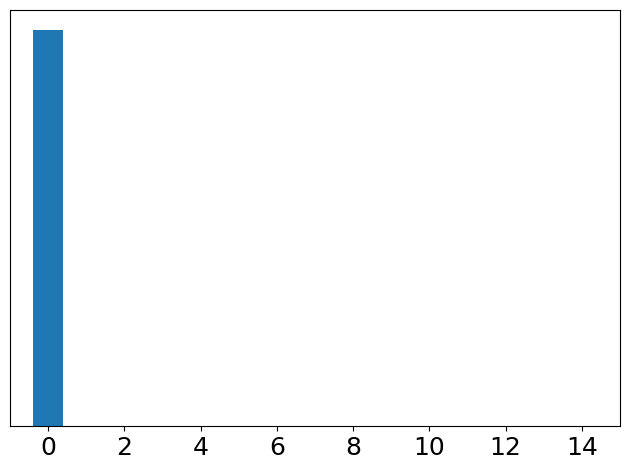

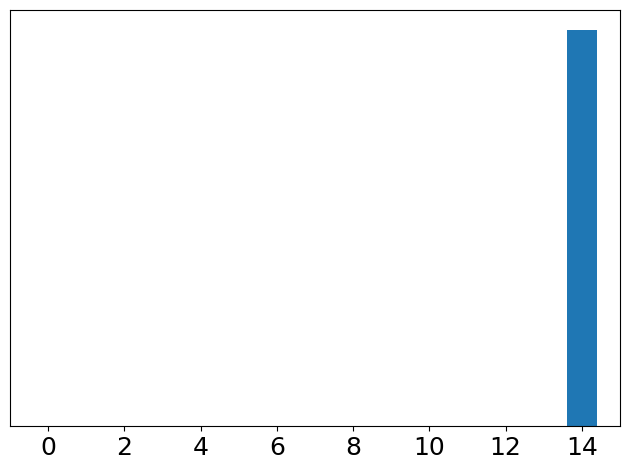

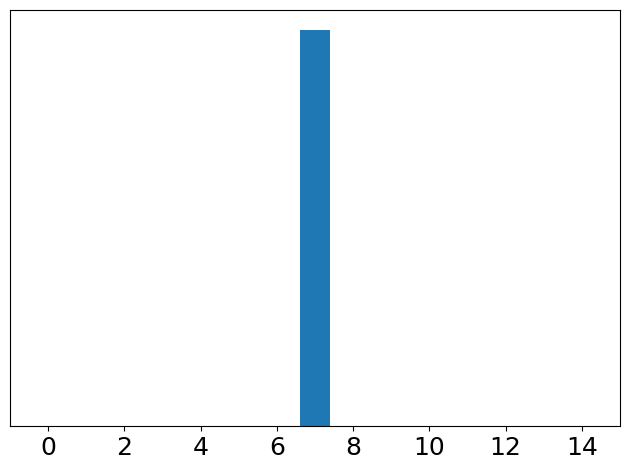

In [65]:
plot_centroid_distributions(kmeans_init, X, 3, 0, method='maxdist', num_runs=200)

**Your Answer:**

Running the above function `plot_centroid_distribution` over 100 runs and K=3, we get singular bar plots on indices 0, 14 and 7. This indicates that the same set of centroids (points 0, 14 and 7) are selected by the `kmeans_init` function every time the initialization is run.

This result is expected, since for the same set of points, X, for each of the 100 runs and a predetermined first centroid as point 0, the function will always output the next centroid deterministically via the `np.argmax()` method which selects the largest distance out of the distances from each point to the nearest centroid.

In terms of uniqueness, this result will be unique for the same set of points X and a fixed initial centroid location. To show this, the value of c1 is changed to 1 and the resulting set of three centroids changes to (1, 14, 3).

#### 2.2 c) Interpreting KMeans++ Initialization (2 Points)

Run `plot_centroid_distributions` using the method **K-Means++** using the code below! The number of clusters is K=3 and the index of the first cluster is 0 (i.e., data point $A$). If the results are unclear, you can increase the value of `num_runs`. Explain the results and discuss whether they meet your expectations of the method **K-Means++**! Use the markdown cell below the plots.

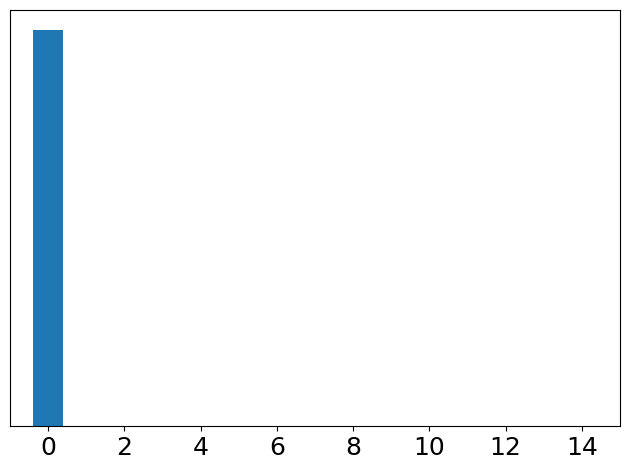

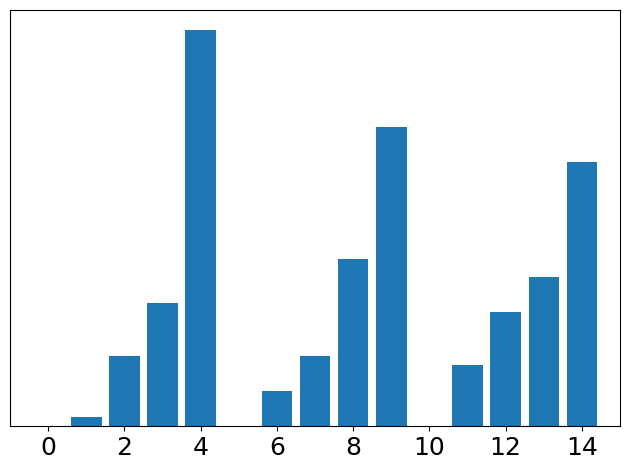

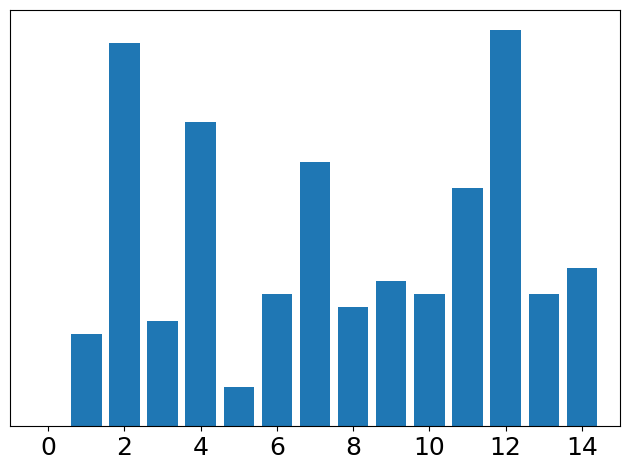

In [66]:
plot_centroid_distributions(kmeans_init, X, 3, 0, method='kmeans++', num_runs=200)

**Your Answer:**

Conversely, running the K-Means++ initialization will result in a distribution of various combinations of centroids selected for each run. As we now observe the presence of multiple bars per plot. This is also expected due to the random nature of selecting a centroid based on the probabilities of each point being selected, which is in turn proportional to the square of their distance to the nearest centroid.

From the plots, we can observe a trend where bars of similar occurrence levels, especially on the second centroid, being spaced out quite evenly. On the third plot, the same pattern is not so apparent, but there is still some separation between the higher occurrence points. This suggests that K-Means++, although has some randomness, is still effective in producing centroids that are spaced relatively evenly apart.

### 2.3 Questions about K-Means (6 Points)

#### 2.3 a) Empty Cluster (3 Points)

**Outline all situations where K-Means may return at least 1 empty cluster!** To address this task, please make the following assumptions:
* The number of samples $N$ in the dataset is $N > 0$
* The number of clusters $K$ when running K-Means is $K \geq 2$
* The initialization of the initial centroids can be arbitrary good or bad

**Your Answer:**

- K-Means may return at least 1 empty cluster when $N < K$
- K-Means may return an empty cluster when one of the cluster centres is 'blocked off' the dataset by being located behind another cluster centre that is closer to the nearest data points.

#### 2.3 b) Outlier Detection (3 Points)

Recall the K-Means results in clusterings that are complete, i.e., each data point is assigned to a cluster. In contrast, DBSCAN has the notion of noise, i.e., points that are not part of any cluster, which can be used to identify outliers (see also Task 2). Now let's assume we want to identify outliers in a dataset but only have an implementation for K-Means available.

**Describe how we can use K-Means to identify outliers!** Since the notion of outliers is not well defined, it's not about having a fool-proof solution but to make a well-informed decision to limit the set of data points that are potential outliers.

**Your Answer:**

- One way to identify outliers from the results of K-Means is to measure the relative distances of each cluster to other clusters. An outlier cluster may be the one that is located far away from the other clusters. One measurement metric to use can be the sum of each cluster's distance to other clusters, normalized by the average over all clusters.